## MACHINE LEARNING 7, 8, 9, 10 & 11

#### MACHINE LEARNING 7 to 11: Assignment

### Problem Statement: Machine Learning 11

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:

    https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-period#!ds =22r0&display=line
    
Hint:

    Following is the command import packages

    and data from pandas import read_csv

    from pandas import datetime

    from matplotlib import pyplot

    from statsmodels.tsa.arima_model
    
    import ARIMA from sklearn.metrics

    import mean_squared_error def

    parser(x):

    return datetime.strptime('190'+x, '%Y-%m')

    series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0],
    index_col=0, squeeze=True, date_parser=parser)

In [3]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv(r'sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')
series.head()
import warnings
warnings.filterwarnings('ignore')

In [4]:
series.dropna(axis=0, inplace=True)

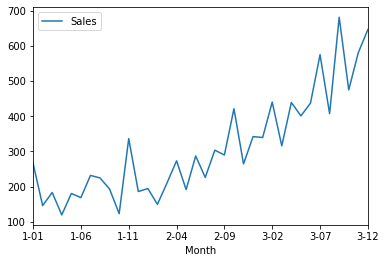

In [5]:
series.plot()
pyplot.show()

Shampoo sales have a clear trend that means time series is not stationary and will require differencing to make it stationary.

In [6]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [7]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [9]:
train, test = X[0:size], X[size:len(X)]

In [12]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964466, expected=421.600000
predicted=290.313820, expected=264.500000
predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 7547.806


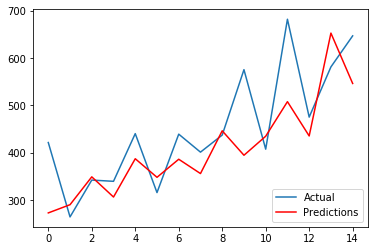

In [14]:
# Plot actual vs predicted sales data

pyplot.plot(test,label='Actual')
pyplot.plot(predictions, color='red', label='Predictions')
pyplot.legend(loc=4)
pyplot.show()